# ECE 457B - Tutorial 3

1. Introduction to [Sklearn](https://scikit-learn.org/stable/index.html)
2. The [IRIS dataset](https://archive.ics.uci.edu/ml/datasets/iris)
3. Comparing Models

In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Load and Explore Dataset

Features
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm


Classes:
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

"One class is linearly separable from the other 2; the latter are NOT linearly separable from each other."

In [2]:
iris = load_iris()
x = iris.data
y_ = iris.target

print("Size of features: {}".format(x.shape))
print("Size of labels: {}".format(y_.shape))

print("Sample data: {}".format(x[:3]))
print("Sample labels: {}".format(y_[:3]))

class_names = ['setosa', 'versicolor', 'virginica']


Size of features: (150, 4)
Size of labels: (150,)
Sample data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
Sample labels: [0 0 0]


#### One hot encoding Example:
labels: [0,0,1,2]

0
0
1
2

3 different labels hence 3 columns:
class-0,class-1,class-2
1 0 0
1 0 0
0 1 0
0 0 1

## Data Preprocessing and Preparation

Let's explore how we can use sklearn for full data proprocessing

1. Normalize the feature space
2. For the purpose of using a neural network and since this is a classification problem, we will be using softmax activation in the output layer. For that, we will change the labels to be one-hot-encoded (sklearn)
3. Lets use a 80-20 train-test split. For that, we'll use the train_test_split function from sklearn

In [3]:
# Normalize the data
X_norm = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)

# Split the data into training and testing
# training 80% testing 20%
train_x, test_x, train_y, test_y = train_test_split(X_norm, y_, test_size=0.20)

train_y_enc = encoder.fit_transform(train_y.reshape(-1,1))
test_y_enc = encoder.fit_transform(test_y.reshape(-1,1))

print("Sample train data: {}".format(train_x[:3]))
print("Sample train labels: {}".format(train_y_enc[:3]))

Sample train data: [[0.13888889 0.41666667 0.06779661 0.        ]
 [0.55555556 0.20833333 0.6779661  0.75      ]
 [0.66666667 0.45833333 0.57627119 0.54166667]]
Sample train labels: [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [4]:
## Difference between sparse true here and sparse false as visible above
encoder2 = OneHotEncoder(sparse=True)
train_y_enc2 = encoder2.fit_transform(train_y.reshape(-1,1))
print("Sample train labels: {}".format(train_y_enc2[:3]))

Sample train labels:   (0, 0)	1.0
  (1, 2)	1.0
  (2, 1)	1.0


## The Model

In [5]:
# Build the model
model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='input'))
model.add(Dense(10, activation='relu', name='hidden1'))
model.add(Dense(3, activation='softmax', name='output'))

print(model.summary())


# Compile the model
# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 10)                50        
_________________________________________________________________
hidden1 (Dense)              (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Islam\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [6]:
# Train the model
model.fit(train_x, train_y_enc, verbose=1
          , batch_size=5, epochs=50)

Epoch 1/50
24/24 [==============================] - 2s 3ms/step - loss: 1.0484 - accuracy: 0.3417
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0235 - accuracy: 0.3417
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0016 - accuracy: 0.3583: 0s - loss: 1.0021 - accuracy: 0.35
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.9806 - accuracy: 0.4333
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.9617 - accuracy: 0.5750
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.9410 - accuracy: 0.6500
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.9169 - accuracy: 0.6667
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.8925 - accuracy: 0.6667
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.8675 - accuracy: 0.6667
Epoch 10/50
24/24 [==============================] - 0s 3ms/step - loss: 0.8396 - 

In [7]:
# Test on unseen data

results = model.evaluate(test_x, test_y_enc)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 162ms/step - loss: 0.2905 - accuracy: 0.9333
Final test set loss: 0.290549
Final test set accuracy: 0.933333


## Confusion Matrix

[[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.80      0.89        10
   virginica       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



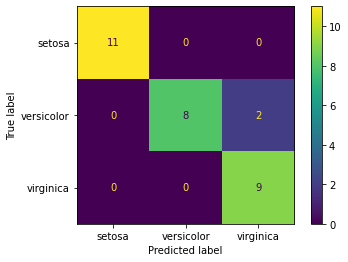

In [8]:
# y_mlp = model.predict_classes(test_x)
y_mlp =np.argmax(model.predict(test_x), axis=-1)
cm_mlp = confusion_matrix(test_y, y_mlp)
print(cm_mlp)
print(classification_report(test_y, y_mlp, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_mlp,display_labels=class_names)
disp1.plot()